# Model `BinaryMFThreshold`

With initial factorization `U` and `V` provided by `NMFSklearn`.

In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


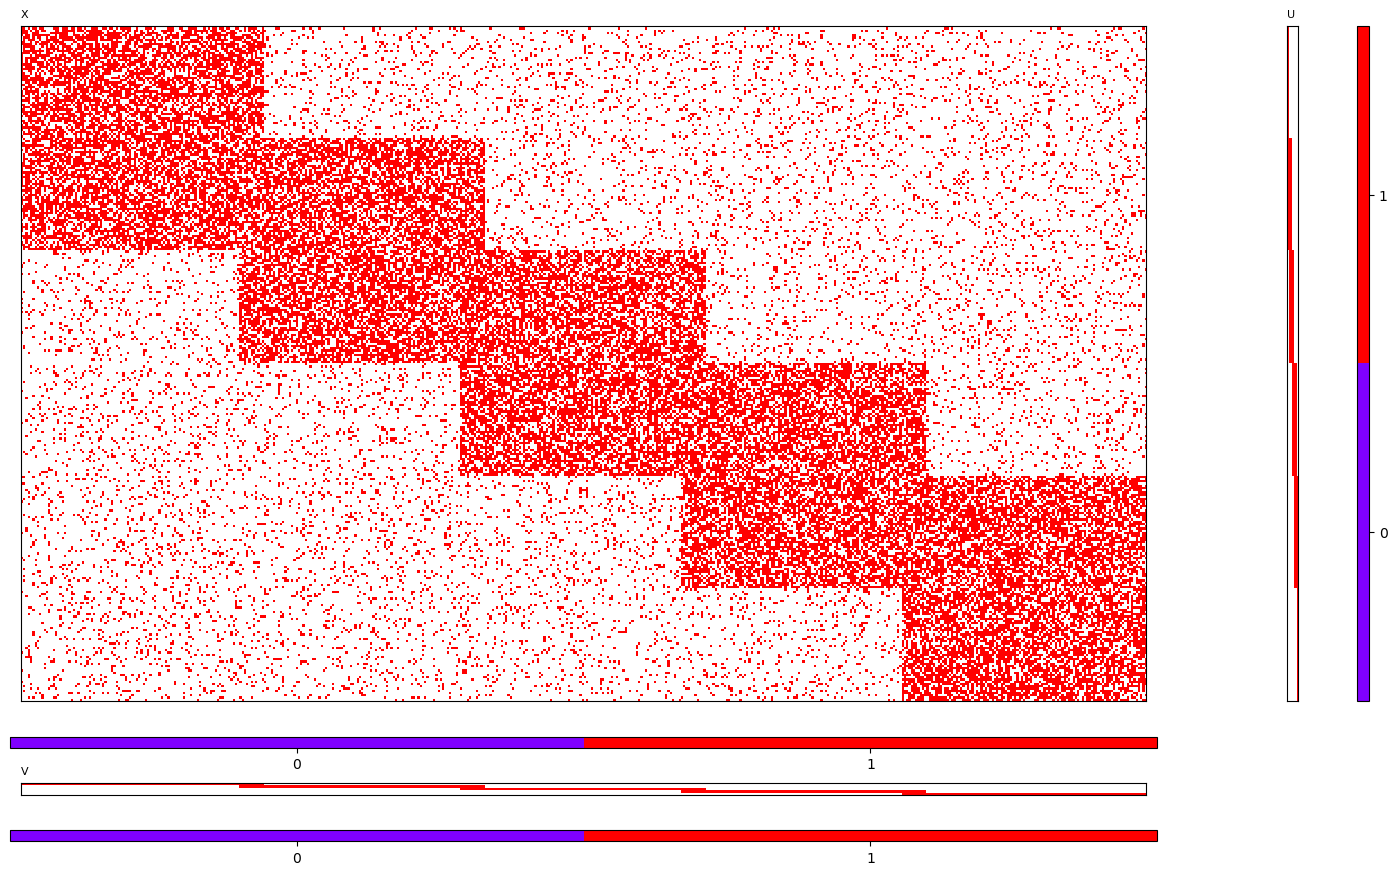

<Figure size 640x480 with 0 Axes>

In [10]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [11]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [12]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 30295
[I]   val_size     : 4328
[I]   test_size    : 8656
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 106721
[I]   n_negatives  : 43279
[I]   train_size   : 30295
[I]   val_size     : 4328
[I]   test_size    : 8656
[I]   seed         : 2023


In [13]:
# shared params
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 50

# 1. Init with `NMFSklearn`

The thresholding gap can be relatively wide if you init with `BinaryMFPenalty` (`NMFSklearn` followed by `BinaryMFPenalty`), as the factors are already (near) binary.

[I] k            : 50
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvda
[I] solver       : mu
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.


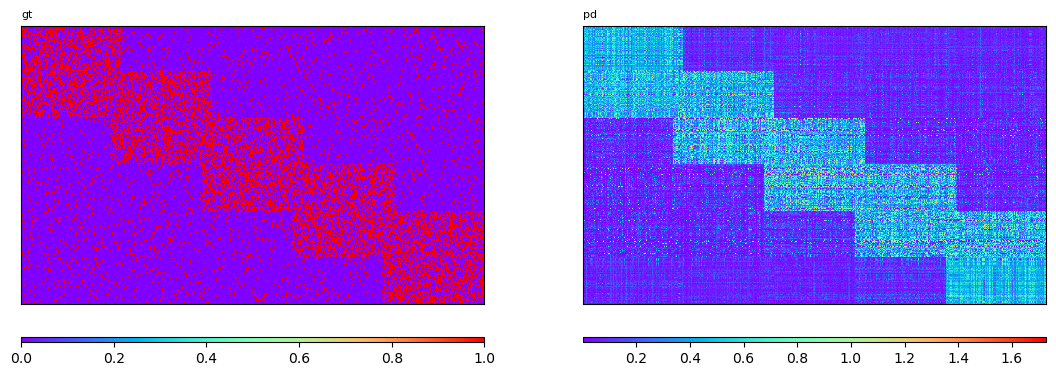

[I] model saved as: 24-06-22_21-39-10_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

In [14]:
from models import NMFSklearn

model_nmf = NMFSklearn(k=k, solver='mu', init_method='nndsvda', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

U, V = model_nmf.U, model_nmf.V

# 2. Init with `WNMF`

In [15]:
# reg = 1
# reg_growth = 3

# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# 3. Vanilla `BinaryMFThreshold`

[I] k            : 50
[I] U            : (300, 50)
[I] V            : (500, 50)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 10
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1719063550
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Normalized U: [1.266582453235855e-99, 1.438657465537967] -> [8.80391951229498e-100, 1.0], V: [1.1817530064951857e-267, 3.4514355471584772] -> [3.4239463271104915e-268, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [33601589.204, 25233036.305]
[I]     Wolfe line search iter       : 1
[I]     num of function evals        : 31
[I]     num of gradient evals        : 3
[I]     function value update        : 2433632.594 -> 10330.158
[I]     threshold update             : [0.100, 0.100] -> [0.350, 0.288]
[I]     threshold update direction   : [0.250, 0.188]
[I]     threshold 

train  \
                                                                    0   
                time iter         u         v             F    Recall   
0  22/06/24 09:39:11    0  0.100000  0.100000  2.433633e+06  0.806008   
1  22/06/24 09:39:11    1  0.350351  0.288001  1.033016e+04  0.035881   
2  22/06/24 09:39:11    2  0.359290  0.294998  1.027618e+04  0.030368   
3  22/06/24 09:39:12    3  0.358140  0.293957  1.027487e+04  0.030863   
4  22/06/24 09:39:12    4  0.358332  0.293202  1.027485e+04  0.030929   
5  22/06/24 09:39:12    5  0.358600  0.293321  1.027480e+04  0.030863   
6  22/06/24 09:39:12    6  0.361473  0.289665  1.027469e+04  0.032415   
7  22/06/24 09:39:13    7  0.361512  0.289757  1.027468e+04  0.032415   
8  22/06/24 09:39:13    8  0.361416  0.289738  1.027468e+04  0.032415   
9  22/06/24 09:39:13    9  0.361456  0.289825  1.027468e+04  0.032415   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.429026  0.744173  0.559982  0.565850  0.043029  0.624367  0.079976   
1  0.925106  0.804693  0.069082  0.003004  0.011064  0.963487  0.004725   
2  0.931174  0.803713  0.058818  0.002311  0.010121  0.964693  0.003762   
3  0.931275  0.803807  0.059746  0.002311  0.009960  0.964587  0.003751   
4  0.931412  0.803820  0.059870  0.002311  0.009940  0.964573  0.003750   
5  0.931275  0.803807  0.059746  0.002311  0.009960  0.964587  0.003751   
6  0.932574  0.804107  0.062652  0.002542  0.010446  0.964273  0.004088   
7  0.932574  0.804107  0.062652  0.002542  0.010446  0.964273  0.004088   
8  0.932574  0.804107  0.062652  0.002542  0.010446  0.964273  0.004088   
9  0.932574  0.804107  0.062652  0.002542  0.010446  0.964273  0.004088   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.564464  0.085847  0.628007  0.149029  
1  0.001848  0.013617  0.934673  0.003255  
2  0.001617  0.014170  0.935893  0.002903  
3  0.001617  0.013944  0.935787  0.002899  
4  0.001617  0.013917  0.935773  0.002898  
5  0.001617  0.013944  0.935787  0.002899  
6  0.001617  0.013295  0.935460  0.002884  
7  0.001617  0.013295  0.935460  0.002884  
8  0.001617  0.013295  0.935460  0.002884  
9  0.001617  0.013295  0.935460  0.002884

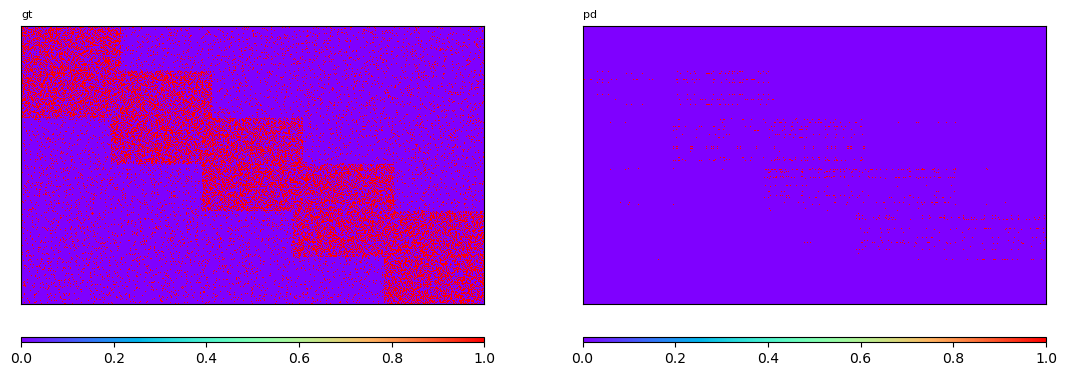

[I] model saved as: 24-06-22_21-39-14_BinaryMFThreshold.pickle


<Figure size 640x480 with 0 Axes>

In [16]:
from models import BinaryMFThreshold

u, v = 0.1, 0.1
# u, v = 0.5, 0.5
W = 'full'

task = 'reconstruction'
init_method = 'custom'
lamda = 10

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v, lamda=lamda, init_method=init_method)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=True, display=False)

# a. Debug: visualize F

In [31]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# N = 50
# dpi = 100

In [32]:
# x = np.linspace(0, 1.2, N)
# y = np.linspace(0, 1.2, N)
# Z = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         Z[i, j] = model.F([X[i, j], Y[i, j]])
        
# # fig = plt.figure(dpi=dpi)
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='hot')
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# levels = np.logspace(0, 10, num=50, endpoint=True, base=10)
# levels = (levels - levels.min()) / (levels.max() - levels.min())
# levels = levels * (Z.max() - Z.min()) + Z.min()

# plt.figure(dpi=dpi)
# cp = plt.contour(X, Y, Z, levels=levels)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# b. Visualize dF

In [33]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()